In [75]:
import os
os.chdir('/home/jupyter/aicup-meddata-pp')

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def statistics(df):
    phistr = "PATIENT, DOCTOR, USERNAME, PROFESSION, ROOM, DEPARTMENT, HOSPITAL, ORGANIZATION, STREET, CITY, STATE, COUNTRY, ZIP, LOCATION-OTHER, AGE, DATE, TIME, DURATION, SET, PHONE, FAX, EMAIL, URL, IPADDR, SSN, MEDICALRECORD, HEALTHPLAN, ACCOUNT, LICENSE, VEHICLE, DEVICE, BIOID, IDNUM, PHI".split(',')
    phisterms = [_.replace(' ','') for _ in phistr]

    phi_cates = []
    phi_contents = []
    for phisterm in phisterms:
        for id, row in df.iterrows():
            phi_pairs = row.label.split('\\n')
            for phi_pair in phi_pairs:
                cate = phi_pair.split(':')[0]
                content = ''.join(phi_pair.split(':')[1:])
                phi_cates.append(cate)
                phi_contents.append(content)
    phidf = pd.DataFrame({'cate':phi_cates, 'content':phi_contents})
    phidf['content_len'] = phidf.content.apply(lambda x:len(x))
    return phidf

In [36]:
train_df = pd.read_csv('./train_pp.tsv', delimiter='\t')
valid_df = pd.read_csv('./valid_pp.tsv', delimiter='\t')
test_df = pd.read_csv('./test_pp.tsv', delimiter='\t')

In [37]:
train_phi = statistics(train_df)
valid_phi = statistics(valid_df)

In [43]:
import matplotlib.pyplot as plt

def phi_boxplot(phi: pd.DataFrame):
    # 使用 groupby 和 agg 計算每個 cate 的最小值和最大值
    min_max_values = phi.groupby('cate')['content_len'].agg(['min', 'max'])

    # 重新組合資料，將最小值和最大值加到原始資料中
    phi_min_max_values = phi.merge(min_max_values, on='cate', suffixes=('', '_min_max'))

    # 將最小值和最大值整合到 cate 字串中
    phi_min_max_values['cate_display'] = phi_min_max_values.apply(lambda row: f'{row["cate"]} ({row["min"]}, {row["max"]})', axis=1)

    # 使用 boxplot，並顯示最小值和最大值的數據點
    boxplot = phi_min_max_values[['cate_display', 'content_len']].boxplot(by='cate_display', showfliers=True)

    # 設定 y 軸範圍為最小值到最大值的範圍
    for label, pos in zip(phi_min_max_values['cate_display'].unique(), boxplot.get_xticks()):
        boxplot.annotate('', (pos, phi_min_max_values.loc[phi_min_max_values['cate_display'] == label, 'content_len'].max()), xytext=(0, 5), rotation=90, textcoords='offset points', ha='center', va='bottom')

    # 設定 X 軸刻度文字方向為 vertical
    plt.setp(boxplot.get_xticklabels(), rotation=90, ha='center')

    plt.show()


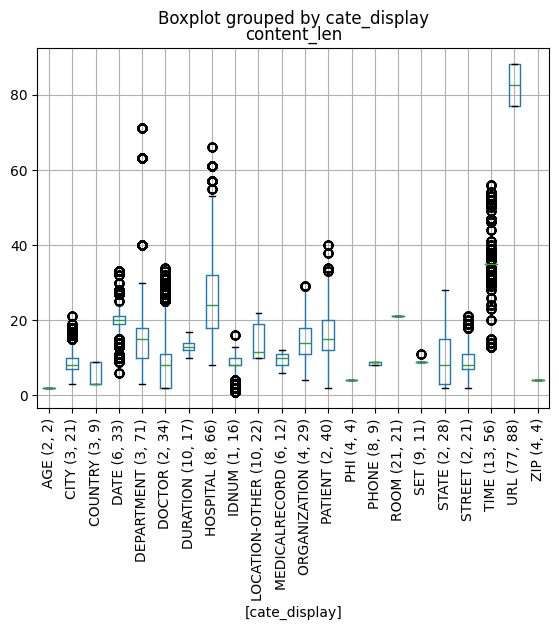

In [45]:
phi_boxplot(train_phi)

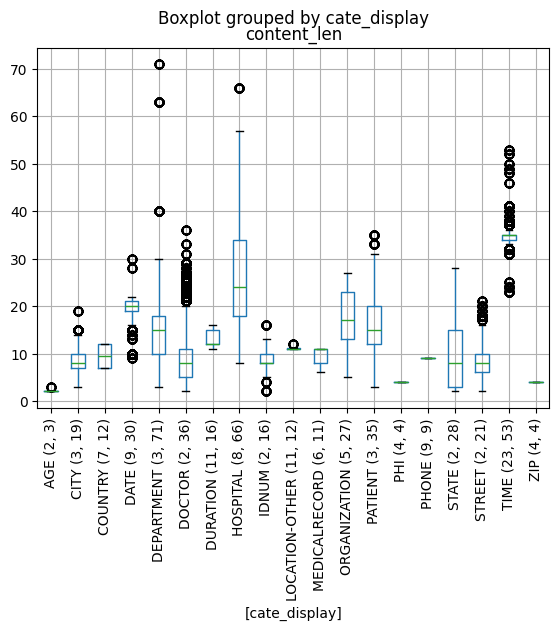

In [46]:
phi_boxplot(valid_phi)

In [59]:
import matplotlib.pyplot as plt

def phi_count_bar_plot(phi: pd.DataFrame, withphi=True):
    # 計算每個 cate 的數量
    cate_counts = phi['cate'].value_counts() if withphi else phi[phi.cate!='PHI']['cate'].value_counts()
    
    # 繪製 bar chart
    cate_counts.plot(kind='bar', rot=90)

    # 設定標籤和標題
    plt.xlabel('Cate')
    plt.ylabel('Count')
    plt.title('Count of each Cate')

    plt.show()


In [62]:
train_phi.groupby('cate').count()

,content,content_len
cate,,
AGE,4318,4318
CITY,31926,31926
COUNTRY,102,102
DATE,162248,162248
DEPARTMENT,35224,35224
DOCTOR,222156,222156
DURATION,952,952
HOSPITAL,61200,61200
IDNUM,124712,124712


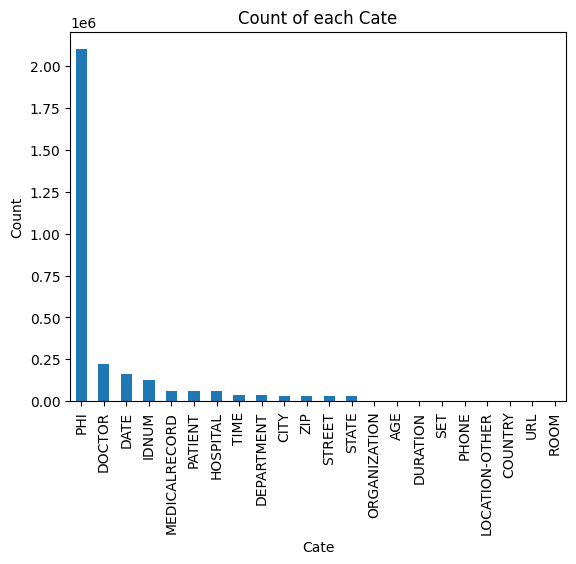

In [60]:
phi_count_bar_plot(train_phi)

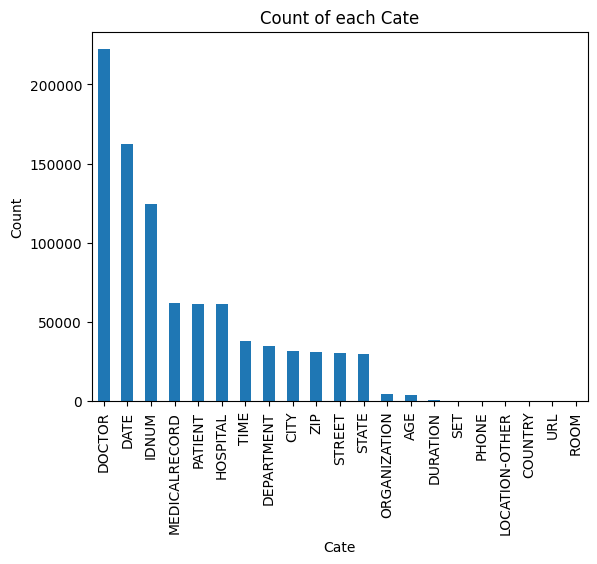

In [61]:
phi_count_bar_plot(train_phi, withphi=False)

In [55]:
valid_phi.groupby('cate').count()

,content,content_len
cate,,
AGE,1938,1938
CITY,11458,11458
COUNTRY,68,68
DATE,54740,54740
DEPARTMENT,12376,12376
DOCTOR,74358,74358
DURATION,204,204
HOSPITAL,20162,20162
IDNUM,40018,40018


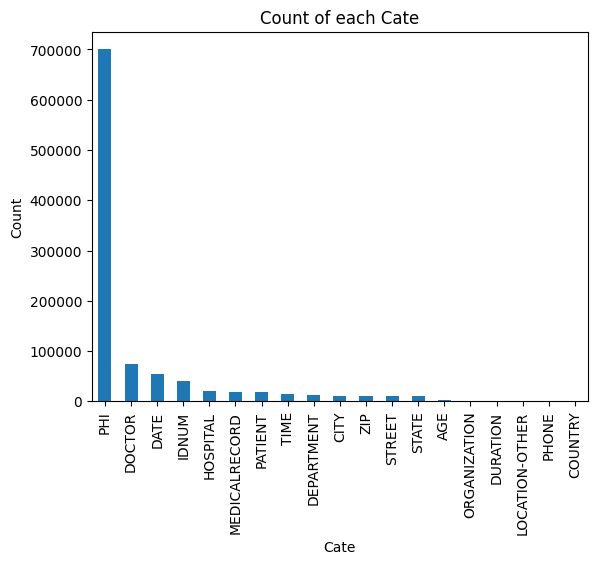

In [63]:
phi_count_bar_plot(valid_phi)

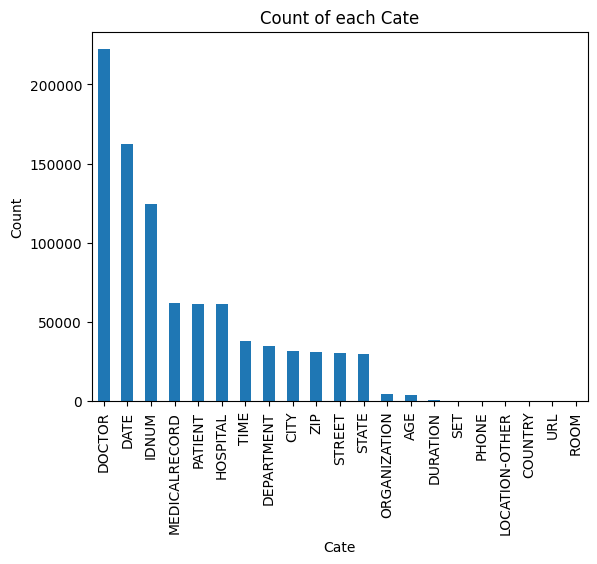

In [64]:
phi_count_bar_plot(train_phi, withphi=False)

# 沒用到的 PHI

In [77]:
all_phi = set("PATIENT, DOCTOR, USERNAME, PROFESSION, ROOM, DEPARTMENT, HOSPITAL, ORGANIZATION, STREET, CITY, STATE, COUNTRY, ZIP, LOCATION-OTHER, AGE, DATE, TIME, DURATION, SET, PHONE, FAX, EMAIL, URL, IPADDR, SSN, MEDICALRECORD, HEALTHPLAN, ACCOUNT, LICENSE, VEHICLE, DEVICE, BIOID, IDNUM, PHI".split(', '))
data_phi = set(train_phi.cate.unique().tolist() + valid_phi.cate.unique().tolist())
all_phi - data_phi

{'ACCOUNT',
 'BIOID',
 'DEVICE',
 'EMAIL',
 'FAX',
 'HEALTHPLAN',
 'IPADDR',
 'LICENSE',
 'PROFESSION',
 'SSN',
 'USERNAME',
 'VEHICLE'}